In [399]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as st
import warnings
import matplotlib.pyplot as plt

%matplotlib inline



# Introduction
___

Maslow's hierarchy of needs provides a theoretical framework for understanding the various levels of human needs and their influence on individual well-being. This study seeks to explore the impact of corruption perception (scenario 2) and GDP (scenario 3) on happiness levels in European and African countries, using Maslow's hierarchy as a guiding perspective.

According to Maslow's theory, once basic physiological and safety needs are met, individuals focus on higher-level needs such as social belonging, esteem, and self-actualization. In light of this, it is hypothesized that in European countries, where these higher-level needs may be more prominent, the perception of corruption may have a greater negative effect on happiness. Conversely, in African countries, where basic needs may be more salient, the influence of GDP on happiness levels may be more significant.

1. We try to determine if there is a statistically significant difference in the level of happiness between European countries and African countries, using a significance level of α = 0.05.
Null Hypothesis: There is no statistically significant difference in the level of happiness between European and African countries (μE - μA = 0).
Alternative Hypothesis: The level of happiness in European countries is statistically significantly greater than in African countries (μE - μA > 0).

2. We try to determine if there is a statistically significant difference in the effect of the perception of corruption on the happiness score between European countries and African countries, using a significance level of α = 0.05.
Null Hypothesis: There is no statistically significant difference in the effect of the perception of corruption on the happiness score between European countries and African countries. (μE - μA = 0)
Alternative Hypothesis: In European countries, there is a greater effect of the perception of corruption on the happiness score compared to African countries. (μE - μA > 0) 

3. We try to determine if there is a statistically significant difference in the effect of the GDP index (gross domestic product) on the happiness index between African countries and European countries, using a significance level of α = 0.05.
Null Hypothesis: There is no statistically significant difference in the effect of the GDP index on the happiness index between African countries and European countries.
 (μE - μA = 0)
Alternative Hypothesis: In European countries, there is a lower effect of the GDP index on the happiness score compared to African countries. (μA - μE > 0)


# Data exploration
___

Loading the data:

In [400]:
data = pd.read_csv("World_Happiness_Report_2019.csv")

pd.set_option('display.max_columns',None)

data.head(20)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.480,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.330,0.380
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [401]:
data.shape

(156, 9)

Checking Null Values

In [402]:
data.isnull().sum() 

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

Checking Values type

In [403]:
data.dtypes

Overall rank                      int64
Country or region                object
Score                           float64
GDP per capita                  float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
dtype: object

<h3>Conclusions</h3>
As we can see, wa have 156 rows (observations) and 9 features. All features but the "Country or region" are numeric from type float64 or int64. Accordingly, we won't have to make any type changes to explore or manipulate the data. We know that all the countries and regions names in this data are unique, which means each of them appears in the data only once.  

<h3>About the Data</h3>

The World Happiness Report contains nine features. The "Overall rank" feature represents the unique ranking of countries based on their happiness scores. The overall rank column typically assigns a numerical rank to each country, indicating their relative position in the happiness rankings.<br><br>

The "Country or region" feature represents the country or region the data in each column refers to, and the "score" feature is the Happiness score. The Happiness Score is a metric that was measured in 2019 by asking the sampled people the following question: "How would you rate your happiness on a scale of 0 to 10 where 10 is the happiest."<br><br>

The six other features in this data represent the extent to which each feature contributes to the calculation of the Happiness Score.<br>
Below, there is an explanation of each feature and what it meant in its original form:

- <b>GDP per capita</b> - GDP per capita is a measure of a country's economic output that accounts for its number of people.<br><br>
- <b>Social support</b> - Social support means having friends and other people, including family, to turn to in times of need or crisis to give you a broader focus and positive self-image. Social support enhances the quality of life and provides a buffer against adverse life events.<br><br>
- <b>Healthy life expectancy</b> - Healthy Life Expectancy is the average number of years that a newborn can expect to live in "full health"—in other words, not hampered by disabling illnesses or injuries.<br><br>
- <b>Freedom to make life choices</b> - Freedom of choice describes an individual's opportunity and autonomy to perform an action selected from at least two available options, unconstrained by external parties.<br><br>
- <b>Generosity</b> - the quality of being kind and generous.<br><br>
- <b>Perceptions of corruption</b> - The Corruption Perceptions Index (CPI) is an index published annually by Transparency International since 1995 which ranks countries "by their perceived levels of public sector corruption, as determined by expert assessments and opinion surveys.

Below are the distributions of all the numeric features from an overall view of all the countries in the data sets we were given and their descriptive data:

Y-axis = Amount of countries
X-axis = Value


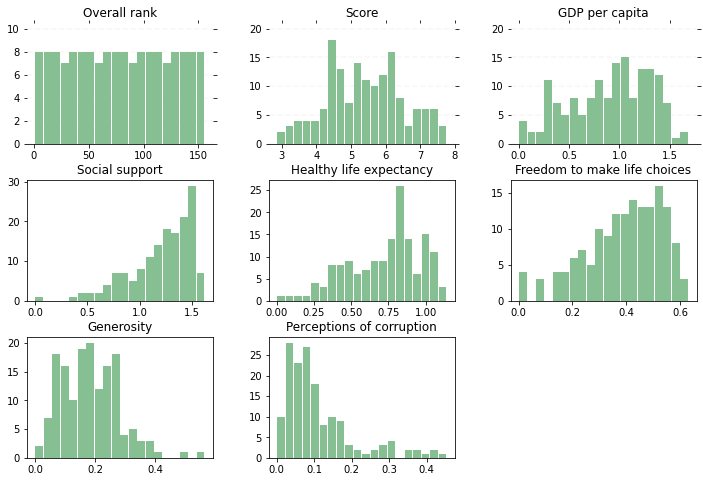

In [404]:
print("Y-axis = Amount of countries")
print("X-axis = Value")
ax = data.hist(bins=20, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

In [405]:
data.describe() 

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In our project, we will investigate three features of this data: <br>
1. Score
2. GDP per capita
3. Perceptions of corruption <br>

We will investigate the impact of the <i>"GDP per capita"</i> feature and the <i>"Perceptions of corruption"</i> feature on the happiness score in Europe and Africa.<br> 
As we can see above, we have no null values, and all the features we will refer to are of type float64. Therefore we can proceed to the Descriptive statistics overview. 

In [406]:
# creating a dataframe which contains only our three needed features
filtered_data = data[["Country or region","Score","GDP per capita","Perceptions of corruption"]].copy()

In [407]:
filtered_data.describe() 

,Score,GDP per capita,Perceptions of corruption
count,156.000000,156.000000,156.000000
mean,5.407096,0.905147,0.110603
std,1.113120,0.398389,0.094538
min,2.853000,0.000000,0.000000
25%,4.544500,0.602750,0.047000
50%,5.379500,0.960000,0.085500
75%,6.184500,1.232500,0.141250
max,7.769000,1.684000,0.453000


As we saw, our data contains 156 countries. We will refer to those 156 countries as our population. Based on that assumption, we could calculate the Mean value and the variance parameters of the population for those Three features.<br>
For the needs of this course, we will assume a normal distribution for all features. We will test our hypothesis using Z-test, so the parameters we will be interested in are the Mean and the Variance. We will also look at the Median, Minimum and Maximum values for each feature to see the range of values we can expect.

We know that the theoretical range of the score value is [0,10]. 
In practice, the range in 2019 was [2.85,7.77]. 
We could also see that the GDP per capita values are between [0,1.684] and the range of the Perceptions of corruption feature is
[0,0.453].<br><br>

<h3>The next step would be to find out the outliers and decide how to deal with them:</h3>

The population happiness score feature: 

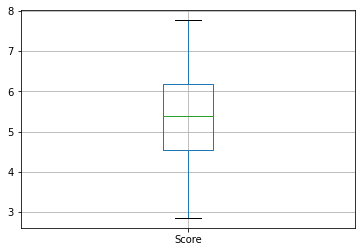

In [408]:
filtered_data.boxplot(column=["Score"])

The population GDP per capita feature: 

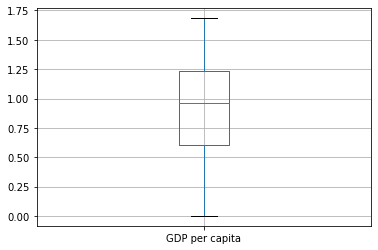

In [409]:
filtered_data.boxplot(column=["GDP per capita"])

The population Perceptions of corruption feature: 

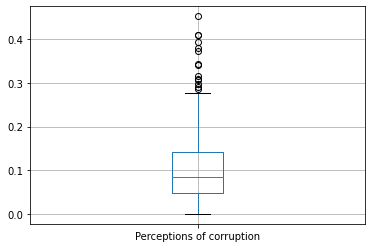

In [410]:
filtered_data.boxplot(column=["Perceptions of corruption"])

In [411]:
filtered_data[filtered_data["Perceptions of corruption"]>0.4]

,Country or region,Score,GDP per capita,Perceptions of corruption
1,Denmark,7.600,1.383,0.410
33,Singapore,6.262,1.572,0.453
151,Rwanda,3.334,0.359,0.411


In the box plot above, it is evident that several countries have Perception of Corruption values exceeding the upper boundary of the graph. Upon closer examination, we observed two distinct clusters of countries in relation to this issue. One cluster is located near the top boundary, while the other cluster is situated further above with even higher values. Based on the data we have, it became apparent that they lack any connecting link. Additionally, these countries represent different regions of the world.

Consequently, we have decided against deleting these countries altogether from the dataset. However, considering the potential bias their high values may introduce to our conclusions, we have opted for a more moderate approach. Specifically, we will selectively modify only the highest values (those greater than 0.4) to a standardized value of 0.4. By doing so, our aim is to ensure the integrity of our analysis while accounting for the influence of these outliers

In [412]:
Rows = list(filtered_data[filtered_data["Perceptions of corruption"]>0.4].index)
filtered_data.loc[Rows, 'Perceptions of corruption'] = 0.4
filtered_data[filtered_data["Perceptions of corruption"]>0.4]

,Country or region,Score,GDP per capita,Perceptions of corruption


# Deeper investigation of our study objects - Africa and Europe:

In our research, we will compare the values separately between Europe and Africa, and we'll not make a comparison between the different features. Therefore, we decided there would be no need to normalize the data.

Since we will compare between two continents only, Europe and Africa, we will want to isolate only the European and African countries.<br>

We used ChatGPT to create a separation between the continents by creating a list containing European countries and a list of all African countries. According to this division, we will divide and filter our data:

In [413]:
continents = pd.read_csv("europe_and_africa_countries_new.csv")
filtered_data["Continent"] = "None"
filtered_data["Continent"].loc[filtered_data['Country or region'].isin(list(continents["Europe"]))] = "EU"
filtered_data["Continent"].loc[filtered_data['Country or region'].isin(list(continents["Africa"]))] = "AF"
filtered_df = filtered_data[(filtered_data['Continent'] == "EU") | (filtered_data['Continent'] == "AF")].copy()

print("Amount of European countries:", str((filtered_df['Continent'] == "EU").sum()))
print("Amount of African countries:", str((filtered_df['Continent'] == "AF").sum()))



Amount of European countries: 45
Amount of African countries: 42


We will explore Europe countries data:

In [414]:
#Europe data
filtered_df.loc[filtered_data['Country or region'].isin(list(continents["Europe"]))].describe() 

,Score,GDP per capita,Perceptions of corruption
count,45.000000,45.000000,45.000000
mean,6.192533,1.210644,0.130444
std,0.881949,0.193094,0.124774
min,4.332000,0.685000,0.000000
25%,5.529000,1.155000,0.031000
50%,6.100000,1.238000,0.079000
75%,6.985000,1.340000,0.210000
max,7.769000,1.609000,0.400000


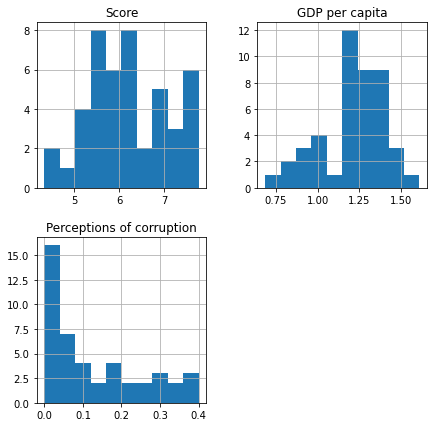

In [415]:
filtered_df.loc[filtered_data['Country or region'].isin(list(continents["Europe"]))].hist(figsize=(7,7)) 
warnings.filterwarnings("ignore")

when looking at those histograms, we noticed that the Perception of Corruption distribution does not look close to a normal distribution. 
We can see that at least 75% of the European countries have a Perception of Corruption value lower or equal to 0.21. This value equals almost half of the max score for this feature.<br> 
However, for the purposes of this course only, we will still do the hypothesis tests under a normal distribution assumption. 

We will do the same process for the African countries:

In [416]:
filtered_df.loc[filtered_data['Country or region'].isin(list(continents["Africa"]))].describe() 

,Score,GDP per capita,Perceptions of corruption
count,42.000000,42.000000,42.000000
mean,4.378595,0.478905,0.093833
std,0.636010,0.301202,0.067111
min,2.853000,0.000000,0.033000
25%,4.090500,0.282750,0.055000
50%,4.463500,0.389000,0.083500
75%,4.711750,0.657500,0.098250
max,5.888000,1.120000,0.400000


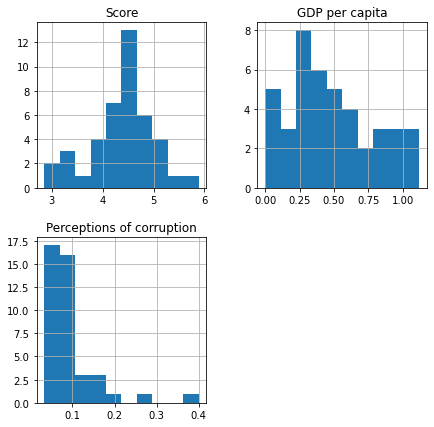

In [417]:
filtered_df.loc[filtered_data['Country or region'].isin(list(continents["Africa"]))].hist(figsize=(7,7)) 
warnings.filterwarnings("ignore")

We recognized the same pattern for the Perception of Corruption feature for the African countries, but in a more extreme manner. Here we can see that more than 75% of African countries have a Perception of Corruption value lower or equal to 0.098. This value equals almost half of the max score for this feature in both, African and European countries.<br>

For African countries, also the GDP per Capita feature does not look close to the shape of a normal distribution. Yet, for the purposes of this course only, we will check our assumptions for both features under the assumption of a normal distribution.

After Exploring the data descriptive values, and before performing our hypothesis test, we wanted to compare btween the two populations visually. In this opportunity, we will also take care of outliers in the continents to prevent any bias. We will look separately on each on of the chosen features: 

<h3>Happiness Score</>

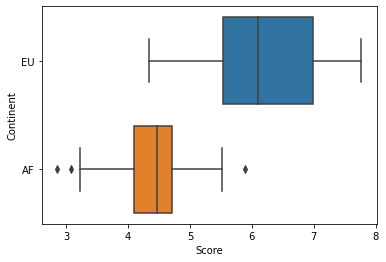

In [418]:
sns.boxplot(data=filtered_df, x="Score", y="Continent")

Finding the outliers

In [419]:

filtered_df[["Country or region", "Score", "Continent"]][(filtered_df["Continent"] == "AF") & (filtered_df["Score"] < 3.5)]


,Country or region,Score,Continent
149,Malawi,3.410,AF
151,Rwanda,3.334,AF
152,Tanzania,3.231,AF
154,Central African Republic,3.083,AF
155,South Sudan,2.853,AF


As we can see, in our data, the lowest outlier scores are for South Sudan and the Central African Republic. <br>
We investigated the possible causes and discovered that South Sudan suffered from a civil war that took the life of almost 600,000 people in 2018, only a year before this questionnaire took place. 
We also noticed that in earlier years South Sudan got a higher happiness score, which was close to the mean value of the happiness score in those years (2015-2017). 
When looking at Africa's history, civil wars are not a rare thing. Usually, there is a country under a condition of a civil war or government tension. This condition probably has a negative impact on the happiness score even if this situation does not represent the continent at this time. Therefore we will consider this high value as an outlier. We would want to reduce its impact but not cancel it entirely. 

As for the Central African Republic, we saw that its score was pretty stable over the years, and we didn't find any additional info that could explain those extremely low values. We decided not to change this value due to this consistency and see this value as a representative value for this feature. 

Due to the reasons mentioned above, we decided to convert any score below 3 to a value of 3.

In [420]:

SS_Row = list(filtered_df[(filtered_df["Score"]<3) & (filtered_df["Continent"] == "AF")].index)
filtered_df.loc[SS_Row, 'Score'] = 3
filtered_df[filtered_df["Country or region"]=="South Sudan"]


,Country or region,Score,GDP per capita,Perceptions of corruption,Continent
155,South Sudan,3.0,0.306,0.091,AF


In [421]:
filtered_df[["Country or region", "Score", "Continent"]][(filtered_df["Continent"] == "AF") & (filtered_df["Score"] > 5.5)]

,Country or region,Score,Continent
56,Mauritius,5.888,AF
71,Libya,5.525,AF


When we look at the outliers on the right-hand side, we see that Mauritius has a very high happiness score. 
We discovered Mauritius is an island considered the only “true" Democracy in Africa and is ranked considerably high in the democracy rank. Nevertheless, it is the richest country in Africa.
In accordance with the unusual characteristics of this country compared to African countries, we decided to exclude this country from the African countries list in the context of the happiness score.

In [422]:
Mauritius_Row = list(filtered_df[filtered_df["Country or region"]=="Mauritius"].index)
filtered_df = filtered_df.drop(Mauritius_Row)

As for the direction of our hypothesis, we can see in the graphs that Europe's median is higher than Africa's median, which supports our hypothesis that suggests the Happiness score will be higher in Europe than in Africa. 

<h3>GDP per Capita</>

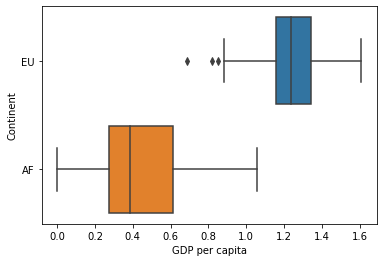

In [423]:
sns.boxplot(data=filtered_df, x="GDP per capita", y="Continent")

Finding the outliers

In [424]:
filtered_df[["Country or region", "GDP per capita", "Continent"]][(filtered_df["Continent"] == "EU") & (filtered_df["GDP per capita"] < 1)]

,Country or region,GDP per capita,Continent
45,Kosovo,0.882,EU
70,Moldova,0.685,EU
77,Bosnia and Herzegovina,0.945,EU
83,North Macedonia,0.983,EU
106,Albania,0.947,EU
115,Armenia,0.850,EU
132,Ukraine,0.820,EU


We decide not to exclude any outliers in this column. We saw that the GDP per Capita score remained relatively constant for all three countries over the earlier years (2015-2018). In addition, the difference between the outliers and the last sample that was in the "normal range" is not very significant. so we won't consider it as an abnormal value and we will not exlude any of them.

As for the direction of our hypothesis, we can see in the graphs that Europe's median is higher than Africa's median. This data looks 
opposite to our hypothesis, which suggests that the GDP per Capita score will be lower in Europe than in Africa. 

<h3>Perceptions of corruption</>

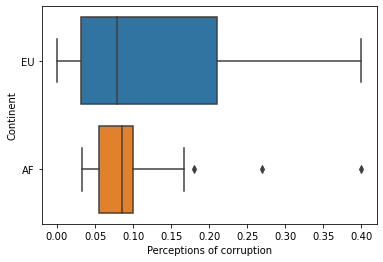

In [425]:
sns.boxplot(data=filtered_df, x="Perceptions of corruption", y="Continent")


Finding the outliers

In [426]:
filtered_df[["Country or region", "Perceptions of corruption", "Continent"]][(filtered_df["Continent"] == "AF") & (filtered_df["Perceptions of corruption"] > 0.15)]

,Country or region,Perceptions of corruption,Continent
71,Libya,0.152,AF
111,Somalia,0.270,AF
119,Gambia,0.167,AF
144,Burundi,0.180,AF
151,Rwanda,0.400,AF


We can see that out of the four outliers, there are only two extreme ones in this data - Somalia and Rwanda. We couldn't ignore the fact that both of those countries values are much bigger (double and almost double) than the last value we didn't consider as an outlier in the graph. Those two countries have suffered from civil wars and unstable governments. For the same reason we mentioned in the GDP per Capita section, we wouldn't want to fully cancel those extreme values impact on the data, but only to reduce it. We decided to convert any "Perceptions of corruption" value greater than 0.2 to the value of 0.2, which is a bit higher than the highest value we didn't consider as an outlier.

In [427]:
SS_Row = list(filtered_df[(filtered_df["Perceptions of corruption"]>0.2) & (filtered_df["Continent"] == "AF")].index)
filtered_df.loc[SS_Row, 'Perceptions of corruption'] = 0.2
filtered_df[filtered_df["Perceptions of corruption"]==0.2]

,Country or region,Score,GDP per capita,Perceptions of corruption,Continent
111,Somalia,4.668,0.000,0.2,AF
151,Rwanda,3.334,0.359,0.2,AF


# Hypothesis Tests
___

We will create a random sample of 30 countries from each Continent. Based on that, we will use the Central Limit Theorem and assume a normal <br> distribution of our three features - Score, GDP per Capita, and Perceptions of corruption. <br><br>
As mentioned before, we referred to our full data as our population, so we could calculate the mean and variance parameters of the populations.
Based on those assumptions, we will use Z-test for the difference in means of two Normal distributions (variances known)


In [428]:
#calculating the population parameters of mean and variance - 
# we will refer to Europe and Africa as two independent populations, so we will calculate both parameters for each continent
Europe_countries = filtered_df[filtered_df["Continent"]=="EU"]
Africa_countries = filtered_df[filtered_df["Continent"]=="AF"]
n_Europe=30
n_Africa=30
a = 0.05

#taking a sample of 30 countries out of all European countries
Europe_sample = (Europe_countries.sample(n=n_Europe,replace=True))
Africa_sample = (Africa_countries.sample(n=n_Africa,replace=True))

# Calculating the "Score" feature varience of the population in Europe and Africa
Europe_score_var = np.var(Europe_countries["Score"])
Africa_score_var = np.var(Africa_countries["Score"])

# Calculating the "GDP per capita" feature varience of the population in Europe and Africa
Europe_GDP_var = np.var(Europe_countries["GDP per capita"])
Africa_GDP_var = np.var(Africa_countries["GDP per capita"])

# Calculating the "Perceptions of corruption" feature varience of the population in Europe and Africa
Europe_corruption_var = np.var(Europe_countries["Perceptions of corruption"])
Africa_corruption_var = np.var(Africa_countries["Perceptions of corruption"])


<h3>Europe VS Africa - Happiness score</h3>

This study aims to determine if there is a statistically significant difference in the level of happiness between European countries and African countries, using a significance level of α = 0.05.<br><br>
<b>Null Hypothesis:</b> There is no statistically significant difference in the level of happiness between European and African countries (μE - μA = 0).<br>
<b>Alternative Hypothesis:</b> The level of happiness in European countries is statistically significantly greater than in African countries (μE - μA > 0)

In [429]:
# Calculating the "Score" feature sample mean value for Africa and Europe
Europe_Score_mean = Europe_sample["Score"].mean()
print(f"Europe Score mean: {Europe_Score_mean}")
Africa_Score_mean = Africa_sample["Score"].mean()
print(f"Africa Score mean: {Africa_Score_mean}")


#culculating Z-score: 
Z_score_score = (Europe_Score_mean - Africa_Score_mean) / (math.sqrt((Europe_score_var/n_Europe)+(Africa_score_var/n_Africa)))

#Calcilating Z-critical score. We will reject the null hypothesis if the Z-score will be greater than the Z-critical score.
Z_critic_score = st.norm.ppf(1-a)

print(f"Z-score {Z_score_score}")
print(f"Z-Critiacal score {Z_critic_score}")

#Making the decision of rejecting H0 or not: 
if Z_score_score>Z_critic_score:
    print("we will reject null hypothesis")
else: print("we could not reject the null hypothesis")





Europe Score mean: 6.277299999999999
Africa Score mean: 4.5157333333333325
Z-score 9.207972193219357
Z-Critiacal score 1.6448536269514722
we will reject null hypothesis


Based on the statistical test performed, at a significance level of α = 0.05, the null hypothesis that there is no statistically significant difference in the level of happiness between European and African countries (μE - μA = 0) is rejected in favor of the alternative hypothesis. The findings suggest that the level of happiness in European countries is statistically significantly greater than in African countries (μE - μA > 0).

<h3>Europe VS Africa -  GDP per capita feature impact on Happiness</h3>

This study aims to determine if there is a statistically significant difference in the effect of the GDP index (gross domestic product) on the happiness index between African countries and European countries, using a significance level of α = 0.05.<br><br>

<b>Null Hypothesis:</b> There is no statistically significant difference in the effect of the GDP index on the happiness index between African countries and European countries. (μE - μA = 0) <br>
<b>Alternative Hypothesis:</b> In European countries, there is a lower effect of the GDP index on the happiness index compared to African countries. (μE - μA < 0)

In [430]:
# Calculating the "GDP per capita" feature sample mean value for Africa and Europe
Europe_GDP_mean = Europe_sample["GDP per capita"].mean()
print(f"Europe's GDP mean: {Europe_GDP_mean}")
Africa_GDP_mean = Africa_sample["GDP per capita"].mean()
print(f"Africa's GDP mean: {Africa_GDP_mean}")

#culculating Z-score: 
Z_GDP = (Europe_GDP_mean - Africa_GDP_mean) / (math.sqrt((Europe_GDP_var/n_Europe)+(Africa_GDP_var/n_Africa)))

#Calcilating Z-critical score. We will reject the null hypothesis if the Z-score will be smaller than the Z-critical score.
Z_critic_GDP = st.norm.ppf(a)

print(f"Z-score: {Z_GDP}")
print(f"Z-Critiacal score: {Z_critic_GDP}")

#Making the decision of rejecting H0 or not:
if Z_GDP<Z_critic_GDP:
    print("we will reject H0 hypothesis")
else: print("we could not reject the null hypothesis")

Europe's GDP mean: 1.2148333333333334
Africa's GDP mean: 0.5761666666666668
Z-score: 10.23076786614856
Z-Critiacal score: -1.6448536269514729
we could not reject the null hypothesis


The null hypothesis that there is no statistically significant difference in the effect of the GDP index on the happiness index between African countries and European countries (μE - μA = 0) cannot be rejected. The findings indicate that there is no evidence to support the alternative hypothesis suggesting a lower effect of the GDP index on the happiness index in European countries compared to African countries (μE - μA < 0). <br><br>
In addition, it should be noted that the mean value of the happiness index in European countries appears to be higher than that of African countries, in the opposite direction from our research hypothesis. We would offer to investigate this direction in Follow-up studies.

<h3>Europe VS Africa -  The Perception of Corruption's impact on Happiness</h3>

This study aims to determine if there is a statistically significant difference in the effect of the perception of corruption on the happiness score between European countries and African countries, using a significance level of α = 0.05.<br><br>

<b>Null Hypothesis:</b> There is no statistically significant difference in the effect of the perception of corruption on the happiness score between European countries and African countries. (μE - μA = 0)<br>
<b>Alternative Hypothesis:</b> In European countries, there is a greater effect of the perception of corruption on the happiness score compared to African countries. (μE - μA > 0) 


In [431]:
# Calculating the "Perceptions of corruption" feature sample mean value for Africa and Europe
Europ_corruption_mean = Europe_sample["Perceptions of corruption"].mean()
print(f"Europe's corruption mean: {Europ_corruption_mean}")
Africa_corruption_mean = Africa_sample["Perceptions of corruption"].mean()
print(f"Africa's corruption mean: {Africa_corruption_mean}")

#culculating Z-score: 
Z_corruption = (Europ_corruption_mean - Africa_corruption_mean) / (math.sqrt((Europe_corruption_var/n_Europe)+(Africa_corruption_var/n_Africa)))

#Calcilating Z-critical score. We will reject the null hypothesis if the Z-score will be greater than the Z-critical score.
Z_critic_corruption = st.norm.ppf(1-a)

print(f"Z-score: {Z_corruption}")
print(f"Z-Critiacal score: {Z_critic_corruption}")

#Making the decision of rejecting H0 or not 
if Z_corruption>Z_critic_corruption:
    print("we will reject H0 hypothesis")
else: print("we could not reject the null hypothesis")

Europe's corruption mean: 0.13916666666666663
Africa's corruption mean: 0.07373333333333333
Z-score: 2.7349567406127435
Z-Critiacal score: 1.6448536269514722
we will reject H0 hypothesis


Based on the statistical test conducted at a significance level of α = 0.05, the null hypothesis that there is no statistically significant difference in the effect of the perception of corruption on the happiness score between European countries and African countries (μE - μA = 0) is rejected in favor of the alternative hypothesis. <br> 
The findings indicate that there is a statistically significant difference, with evidence supporting a greater effect of the perception of corruption on the happiness score in European countries compared to African countries (μE - μA > 0).

<h3>Summary</h3>

In conclusion, we were able to show statistically significant differences for two of our three hypotheses.
According to the research we conducted, it seems that the level of happiness in European countries is statistically significantly higher than the level of happiness in African countries. Also, the impact of the perception of corruption on the happiness index is significantly higher in Europe than in Africa.
Regarding the effect of the GDP per capita index on the happiness index, to our surprise we received results opposite to our hypothesis, meaning that it seems that the impact of this index in European countries on the happiness score is higher than its impact in African countries. Since we conducted a one-sided test following our hypothesis, we cannot conclude about the significance of this difference.